  ## Teorema Central do Limite (TCL) - Aproximação normal para distribuição  Binomial

O teorema do limite central garante que uma variável aleatória definida como a média de um grande número de variáveis aleatórias independentes e identicamente distribuídas é ela própria aproximadamente distribuída normalmente.

### Aproximação normal para a binomial
Uma variável aleatória binomial(n,p) é a soma de n variáveis aleatórias independentes de Bernoulli(p), cada uma igual a 1 com probabilidade p e 0 com probabilidade 1-p. A média de uma variável de Bernoulli(p) é p e seu desvio padrão é $\sqrt{p (1 - p)}$. Pelo teorema do limite central, à medida que n aumenta, uma variável binomia(n,p) é aproximadamente normal com média $μ = np$ e desvio padrão $\sqrt{p (1 - p)}$. 

In [1]:
import pandas as pd
import numpy as np
import requests
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
from collections import Counter
import scipy.stats as sts
import random
import math

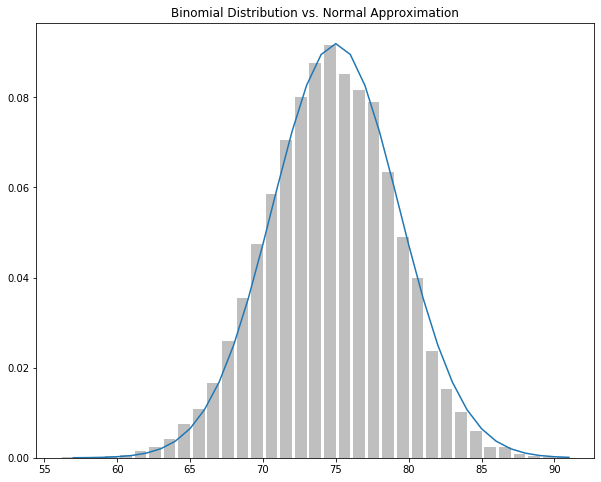

In [5]:
#Observe a aproximação graficamente: 

#Definindo as distribuições
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

 
#Plotando o histograma das amostras binomiais x distribuição normal 
plt.figure(figsize = (10, 8)) #tamanho da figura
def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use um gráfico de barras para mostrar as amostras binomiais
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],0.8,color='0.75')
    
    def normal_cdf(x, mu=0,sigma=1):
        return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
       
 # use o gráfico de linha para mostrar a aproximação normal
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
# Por exemplo, quando você chama make_hist (0,75, 100, 10000), obtém o gráfico a seguir.
make_hist (0.75, 100, 10000)  # altere os valores e observe o a mudança no gráfico.